In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.patches as  mpatches
from matplotlib.lines import Line2D
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
plt.style.use('../../notebooks/paper/paper.mplstyle')
double_textwidth = 7.1 #inches
single_textwidth = 3.5 #inches

In [5]:
fixed = [False, True, False, False, True, False]
fid_values = [2.0, 0.2]

s_0_0 = jsm_mcmc.Chain("../../mcmc/inference_tests/our_stats/s0_data/mock_0_0/chain.h5", fixed=fixed, Nburn=100, Nthin=15)
s_0_0_nadler = jsm_mcmc.Chain("../../mcmc/inference_tests/nadler_stats/s0_data/mock_0_0/chain.h5", fixed=fixed, Nburn=100, Nthin=15)

s_0_1 = jsm_mcmc.Chain("../../mcmc/inference_tests/our_stats/s0_data/mock_0_1/chain.h5", fixed=fixed, Nburn=100, Nthin=15)
s_0_1_nadler = jsm_mcmc.Chain("../../mcmc/inference_tests/nadler_stats/s0_data/mock_0_1/chain.h5", fixed=fixed, Nburn=100, Nthin=15)

s_0_2 = jsm_mcmc.Chain("../../mcmc/inference_tests/our_stats/s0_data/mock_0_2/chain.h5", fixed=fixed, Nburn=100, Nthin=15)
s_0_2_nadler = jsm_mcmc.Chain("../../mcmc/inference_tests/nadler_stats/s0_data/mock_0_2/chain.h5", fixed=fixed, Nburn=100, Nthin=15)


#s_1_0 = jsm_mcmc.Chain("../../../data/big_files/mock_1_0/chain.h5", fixed=fixed, Nburn=15000, Nthin=25)
s_1_0_nadler = jsm_mcmc.Chain("../../mcmc/inference_tests/nadler_stats/s15_data/mock_1_0/chain.h5", fixed=fixed, Nburn=100, Nthin=15)

s_1_1 = jsm_mcmc.Chain("../../mcmc/inference_tests/our_stats/s15_data/mock_1_1/chain.h5", fixed=fixed, Nburn=100, Nthin=15)
s_1_1_nadler = jsm_mcmc.Chain("../../mcmc/inference_tests/nadler_stats/s15_data/mock_1_1/chain.h5", fixed=fixed, Nburn=100, Nthin=15)

s_1_2 = jsm_mcmc.Chain("../../mcmc/inference_tests/our_stats/s15_data/mock_1_2/chain.h5", fixed=fixed, Nburn=100, Nthin=15)
s_1_2_nadler = jsm_mcmc.Chain("../../mcmc/inference_tests/nadler_stats/s15_data/mock_1_2/chain.h5", fixed=fixed, Nburn=100, Nthin=15)


s_2_0_nadler = jsm_mcmc.Chain("../../mcmc/inference_tests/nadler_stats/s30_data/mock_2_0/chain.h5", fixed=fixed, Nburn=100, Nthin=15)

#s_2_1 = jsm_mcmc.Chain("../../../data/big_files/mock_2_1/chain.h5", fixed=fixed, Nburn=15000, Nthin=25)
s_2_1_nadler = jsm_mcmc.Chain("../../mcmc/inference_tests/nadler_stats/s30_data/mock_2_1/chain.h5", fixed=fixed, Nburn=100, Nthin=15)

s_2_2 = jsm_mcmc.Chain("../../mcmc/inference_tests/our_stats/s30_data/mock_2_2/chain.h5", fixed=fixed, Nburn=100, Nthin=15)
s_2_2_nadler = jsm_mcmc.Chain("../../mcmc/inference_tests/nadler_stats/s30_data/mock_2_2/chain.h5", fixed=fixed, Nburn=100, Nthin=15)

In [5]:
delta_chis_nadler = np.array([s_0_0_nadler.chisq_thin.min() - s_0_0_nadler.chisq_thin.min(), s_0_1_nadler.chisq_thin.min() - s_0_0_nadler.chisq_thin.min(), s_0_2_nadler.chisq_thin.min() - s_0_0_nadler.chisq_thin.min(), 
                              s_1_0_nadler.chisq_thin.min() - s_1_1_nadler.chisq_thin.min(), s_1_1_nadler.chisq_thin.min() - s_1_1_nadler.chisq_thin.min(), s_1_2_nadler.chisq_thin.min() - s_1_1_nadler.chisq_thin.min(),
                              s_2_0_nadler.chisq_thin.min() - s_2_2_nadler.chisq_thin.min(), s_2_1_nadler.chisq_thin.min() - s_2_2_nadler.chisq_thin.min(), s_2_2_nadler.chisq_thin.min() - s_2_2_nadler.chisq_thin.min()])  

In [6]:
delta_chis = np.array([s_0_0.chisq_thin.min() - s_0_0.chisq_thin.min(), s_0_1.chisq_thin.min() - s_0_0.chisq_thin.min(), s_0_2.chisq_thin.min() - s_0_0.chisq_thin.min(), 
                       s_1_0.chisq_thin.min() - s_1_1.chisq_thin.min(), s_1_1.chisq_thin.min() - s_1_1.chisq_thin.min(), s_1_2.chisq_thin.min() - s_1_1.chisq_thin.min(),
                       np.nan, s_2_1.chisq_thin.min() - s_2_2.chisq_thin.min(), s_2_2.chisq_thin.min() - s_2_2.chisq_thin.min()])  

In [7]:
labels = [
    "$S_{0} \\times S_{0}$",
    "$S_{0} \\times S_{15}$",
    "$S_{0} \\times S_{30}$",
    "$S_{15} \\times S_{0}$",
    "$S_{15} \\times S_{15}$",
    "$S_{15} \\times S_{30}$",
    "$S_{30} \\times S_{0}$",
    "$S_{30} \\times S_{15}$",
    "$S_{30} \\times S_{30}$"
]

delta_chis_strs = []
for i in delta_chis:
    delta_chis_strs.append("$\\Delta \\chi^2_{\mathrm{min}}\\approx$"+f"{i:.0f}")

delta_chis_strs_nadler = []
for i in delta_chis_nadler:
    delta_chis_strs_nadler.append("$\\Delta \\chi^2_{\mathrm{min}}\\approx$"+f"{i:.0f}")

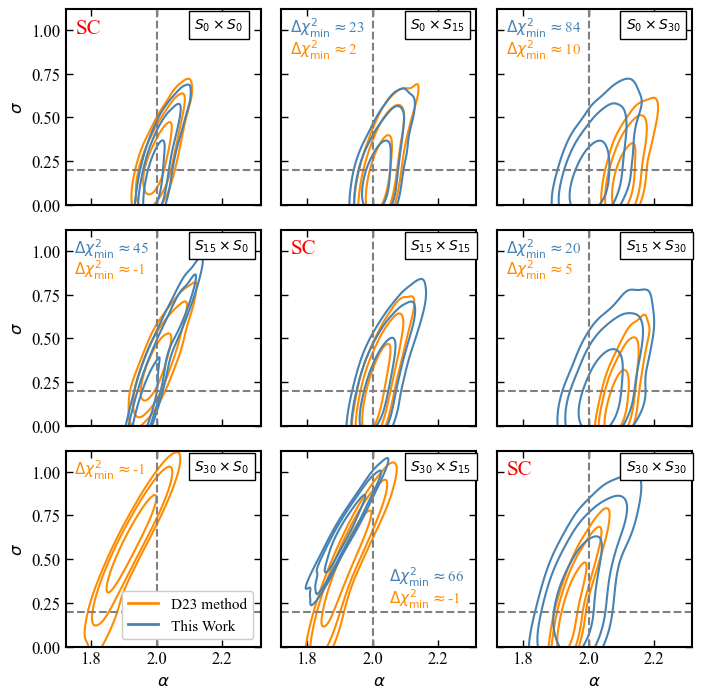

In [ ]:
# Generate some random 2D data for demonstration
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(double_textwidth, double_textwidth))

#s0_0
sns.kdeplot(x=s_0_0_nadler.clean[:, 0], y=s_0_0_nadler.clean[:, 1], ax=axes[0,0], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="darkorange")
sns.kdeplot(x=s_0_0.clean[:, 0], y=s_0_0.clean[:, 1], ax=axes[0,0], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")

#s0_1
sns.kdeplot(x=s_0_1_nadler.clean[:, 0], y=s_0_1_nadler.clean[:, 1], ax=axes[0,1], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2.5, color="darkorange")
sns.kdeplot(x=s_0_1.clean[:, 0], y=s_0_1.clean[:, 1], ax=axes[0,1], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")

#s0_2
sns.kdeplot(x=s_0_2_nadler.clean[:, 0], y=s_0_2_nadler.clean[:, 1], ax=axes[0,2], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="darkorange")
sns.kdeplot(x=s_0_2.clean[:, 0], y=s_0_2.clean[:, 1], ax=axes[0,2], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")

#s1_0
sns.kdeplot(x=s_1_0_nadler.clean[:, 0], y=s_1_0_nadler.clean[:, 1], ax=axes[1,0], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="darkorange")
sns.kdeplot(x=s_1_0.clean[:, 0], y=s_1_0.clean[:, 1], ax=axes[1,0], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2.5, color="steelblue")

#s1_1
sns.kdeplot(x=s_1_1_nadler.clean[:, 0], y=s_1_1_nadler.clean[:, 1], ax=axes[1,1], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="darkorange")
sns.kdeplot(x=s_1_1.clean[:, 0], y=s_1_1.clean[:, 1], ax=axes[1,1], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")

#s1_2
sns.kdeplot(x=s_1_2_nadler.clean[:, 0], y=s_1_2_nadler.clean[:, 1], ax=axes[1,2], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="darkorange")
sns.kdeplot(x=s_1_2.clean[:, 0], y=s_1_2.clean[:, 1], ax=axes[1,2], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")

#s2_0
sns.kdeplot(x=s_2_0_nadler.clean[:, 0], y=s_2_0_nadler.clean[:, 1], ax=axes[2,0], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2.5, color="darkorange")

#s2_1
sns.kdeplot(x=s_2_1_nadler.clean[:, 0], y=s_2_1_nadler.clean[:, 1], ax=axes[2,1], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="darkorange")
sns.kdeplot(x=s_2_1.clean[:, 0], y=s_2_1.clean[:, 1], ax=axes[2,1], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=3, color="steelblue")

#s2_2
sns.kdeplot(x=s_2_2_nadler.clean[:, 0], y=s_2_2_nadler.clean[:, 1], ax=axes[2,2], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="darkorange")
sns.kdeplot(x=s_2_2.clean[:, 0], y=s_2_2.clean[:, 1], ax=axes[2,2], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")

### LABELS

for index, ax in enumerate(axes.flatten()):
    ax.axhline(0.2, ls="--", color="grey")
    ax.axvline(2.0, ls="--", color="grey")
    ax.text(0.66, 0.9, labels[index], transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="k"))

###DIAGONAL
axes[0,0].text(0.05, 0.88, "SC", transform=axes[0,0].transAxes, color="red", fontsize=15)
axes[1,1].text(0.05, 0.88, "SC", transform=axes[1,1].transAxes, color="red", fontsize=15)
axes[2,2].text(0.05, 0.88, "SC", transform=axes[2,2].transAxes, color="red", fontsize=15)

###FIRST ROW
axes[0,1].text(0.045, 0.88, delta_chis_strs[1], transform=axes[0,1].transAxes, color="steelblue", fontsize=11)
axes[0,1].text(0.045, 0.77, delta_chis_strs_nadler[1], transform=axes[0,1].transAxes, color="darkorange", fontsize=11)

axes[0,2].text(0.045, 0.88, delta_chis_strs[2], transform=axes[0,2].transAxes, color="steelblue", fontsize=11)
axes[0,2].text(0.045, 0.77, delta_chis_strs_nadler[2], transform=axes[0,2].transAxes, color="darkorange", fontsize=11)

###SECOND ROW
axes[1,0].text(0.045, 0.88, delta_chis_strs[3], transform=axes[1,0].transAxes, color="steelblue", fontsize=11)
axes[1,0].text(0.045, 0.77, delta_chis_strs_nadler[3], transform=axes[1,0].transAxes, color="darkorange", fontsize=11)

axes[1,2].text(0.045, 0.88, delta_chis_strs[5], transform=axes[1,2].transAxes, color="steelblue", fontsize=11)
axes[1,2].text(0.045, 0.77, delta_chis_strs_nadler[5], transform=axes[1,2].transAxes, color="darkorange", fontsize=11)

###THIRD ROW
axes[2,0].text(0.045, 0.88, delta_chis_strs_nadler[6], transform=axes[2,0].transAxes, color="darkorange", fontsize=11)

axes[2,1].text(0.55, 0.33, delta_chis_strs[7], transform=axes[2,1].transAxes, color="steelblue", fontsize=11)
axes[2,1].text(0.55, 0.22, delta_chis_strs_nadler[7], transform=axes[2,1].transAxes, color="darkorange", fontsize=11)

### LEGEND
myHandle = [Line2D([], [], color='darkorange', lw = 2), Line2D([], [], color='steelblue', lw = 2)]
axes[2,0].legend(handles = myHandle, labels=['D23 method', 'This Work'], loc=4, framealpha=1, fontsize=11)

axes[0,0].set_ylim(0, 1.12)
axes[0,0].set_ylabel("$\sigma$")
axes[1,0].set_ylabel("$\sigma$")
axes[2,0].set_ylabel("$\sigma$")

axes[2,0].set_xlabel("$\\alpha$")
axes[2,1].set_xlabel("$\\alpha$")
axes[2,2].set_xlabel("$\\alpha$")

# Adjust layout
plt.tight_layout()
plt.savefig("../../../paper_1/figures/feature_recovery/matrix_update.pdf", bbox_inches="tight")
plt.show()


In [9]:
sdatasdfadsf

NameError: name 'sdatasdfadsf' is not defined

In [ ]:
from astropy.table import QTable

labels = [
    "$S_{0} \\times S_{0}$",
    "$S_{0} \\times S_{15}$",
    "$S_{0} \\times S_{30}$",
    "$S_{15} \\times S_{0}$",
    "$S_{15} \\times S_{15}$",
    "$S_{15} \\times S_{30}$",
    "$S_{30} \\times S_{0}$",
    "$S_{30} \\times S_{15}$",
    "$S_{30} \\times S_{30}$"]

in_alphas = ["2.0"] * 9
in_sigmas = ["0.2"] * 9

out_alphas = [s_0_0.constraints[0], s_0_1.constraints[0], s_0_2.constraints[0], s_1_0.constraints[0], s_1_1.constraints[0], s_1_2.constraints[0], "-", s_2_1.constraints[0], s_2_2.constraints[0]]
out_sigmas= [s_0_0.constraints[1], s_0_1.constraints[1], s_0_2.constraints[1], s_1_0.constraints[1], s_1_1.constraints[1], s_1_2.constraints[1], "-", s_2_1.constraints[1], s_2_2.constraints[1]]

out_alphas_nadler = [s_0_0_nadler.constraints[0], s_0_1_nadler.constraints[0], s_0_2_nadler.constraints[0], s_1_0_nadler.constraints[0], s_1_1_nadler.constraints[0], s_1_2_nadler.constraints[0], s_2_0_nadler.constraints[0], s_2_1_nadler.constraints[0], s_2_2_nadler.constraints[0]]
out_sigmas_nadler = [s_0_0_nadler.constraints[1], s_0_1_nadler.constraints[1], s_0_2_nadler.constraints[1], s_1_0_nadler.constraints[1], s_1_1_nadler.constraints[1], s_1_2_nadler.constraints[1], s_2_0_nadler.constraints[1], s_2_1_nadler.constraints[1], s_2_2_nadler.constraints[1]]

In [ ]:
tab = QTable([labels, in_alphas, in_sigmas, out_alphas, out_sigmas, out_alphas_nadler, out_sigmas_nadler])
tab.write(filename="../../../paper_1/test.txt", format="latex", overwrite=True)